In [1]:
import pandas as pd
import numpy as np

## Data Preprocessing

## Train Test Split

In [15]:
data = pd.read_csv('../../data/trian_qso_wo_petro_v2.csv')

In [16]:
X = data[['u - g', 'u - r', 'u - i', 'u - z', 'u - j', 'u - k',
       'u - ch1', 'u - ch2', 'g - r', 'g - i', 'g - z', 'g - k', 'g - j',
       'g - ch1', 'g - ch2', 'r - i', 'r - z', 'r - j', 'r - ch1', 'r - k',
       'r - ch2', 'i - z', 'i - j', 'i - k', 'i - ch1', 'i - ch2', 'z - j',
       'z - k', 'z - ch1', 'z - ch2', 'j - ch1', 'j - ch2', 'j - k', 'k - ch1',
       'k - ch2', 'ch1 - ch2']]

y = data['class_bin']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [18]:
count_class = pd.DataFrame(y_train.value_counts()).reset_index()
count_class.rename(columns = {'index' : 'class_cleaned','class_cleaned':'occ'},inplace = True)
count_class

,class_cleaned,class_bin
0,0,128
1,1,107


## Model(basic)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8813559322033898
F1: 0.8444444444444444
recall: 0.8636363636363636


In [20]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
#generate a no skill prediction
ns_prob = [0 for _ in range(len(y_test))]
#prodict probability
clf_prob = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only/
clf_prob = clf_prob[:, 1]

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, ns_prob)
lr_auc = roc_auc_score(y_test, clf_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.959


In [23]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_prob)
roc_plot = pd.DataFrame(columns = ['False Positive Rate (FPR)', 
                                   'True Positive Rate (TPR)', 
                                   'Corresponding Threshold Value'])

roc_plot['False Positive Rate (FPR)'] = lr_fpr.round(5)
roc_plot['True Positive Rate (TPR)'] = lr_tpr.round(5)
roc_plot['Corresponding Threshold Value'] = _.round(5)
roc_plot

,False Positive Rate (FPR),True Positive Rate (TPR),Corresponding Threshold Value
0,0.00000,0.00000,2.00
1,0.02703,0.18182,1.00
2,0.02703,0.22727,0.99
3,0.02703,0.40909,0.98
4,0.02703,0.45455,0.97
5,0.02703,0.54545,0.95
6,0.02703,0.77273,0.77
7,0.08108,0.77273,0.69
8,0.08108,0.86364,0.55
9,0.10811,0.86364,0.54


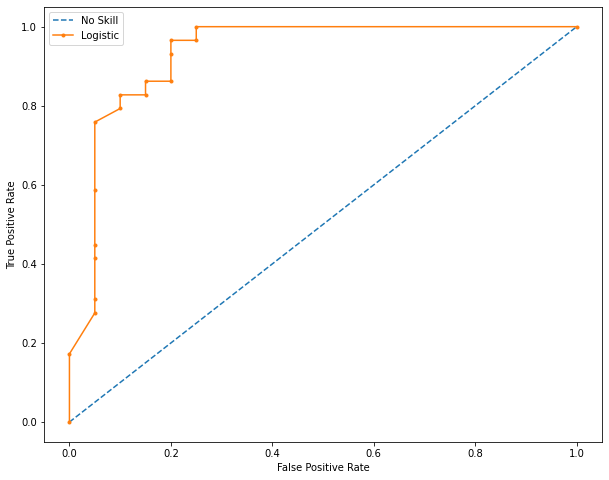

In [11]:
import matplotlib.pyplot as plt
# calculate roc curves



plt.figure(figsize=(10, 8))
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()



In [12]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

zk      0.117857
zw1     0.093075
zw2     0.087474
jw2     0.086696
iw2     0.073715
gw2     0.073606
rw2     0.063655
iw1     0.039622
ik      0.035534
w1w2    0.030634
jk      0.029350
ij      0.024568
zj      0.023620
rw1     0.022815
gw1     0.022654
jw1     0.019644
uw2     0.014820
rk      0.013561
gk      0.013261
uw1     0.012943
ug      0.011334
uj      0.008183
uz      0.007664
rz      0.006717
kw2     0.006557
kw1     0.006553
uk      0.006378
gj      0.006324
gi      0.006090
gr      0.006066
gz      0.005515
rj      0.005215
ri      0.005177
ui      0.004560
iz      0.004344
ur      0.004222
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


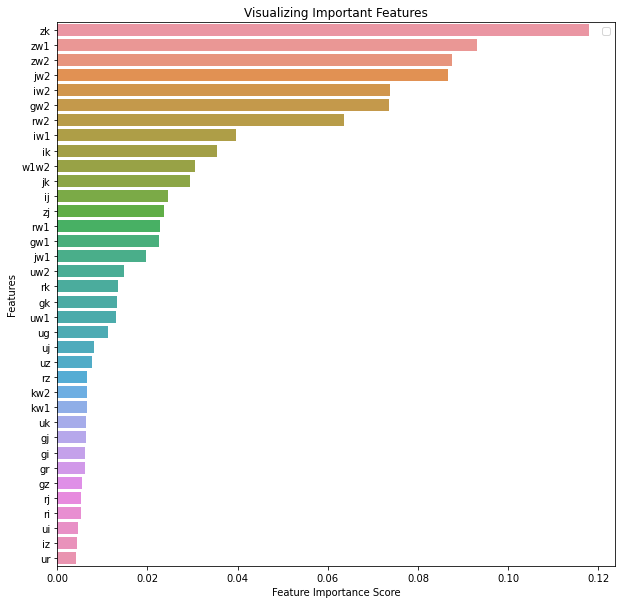

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()



import pickle
filename = '../saved_models/rfc_baseline.sav'
pickle.dump(clf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))